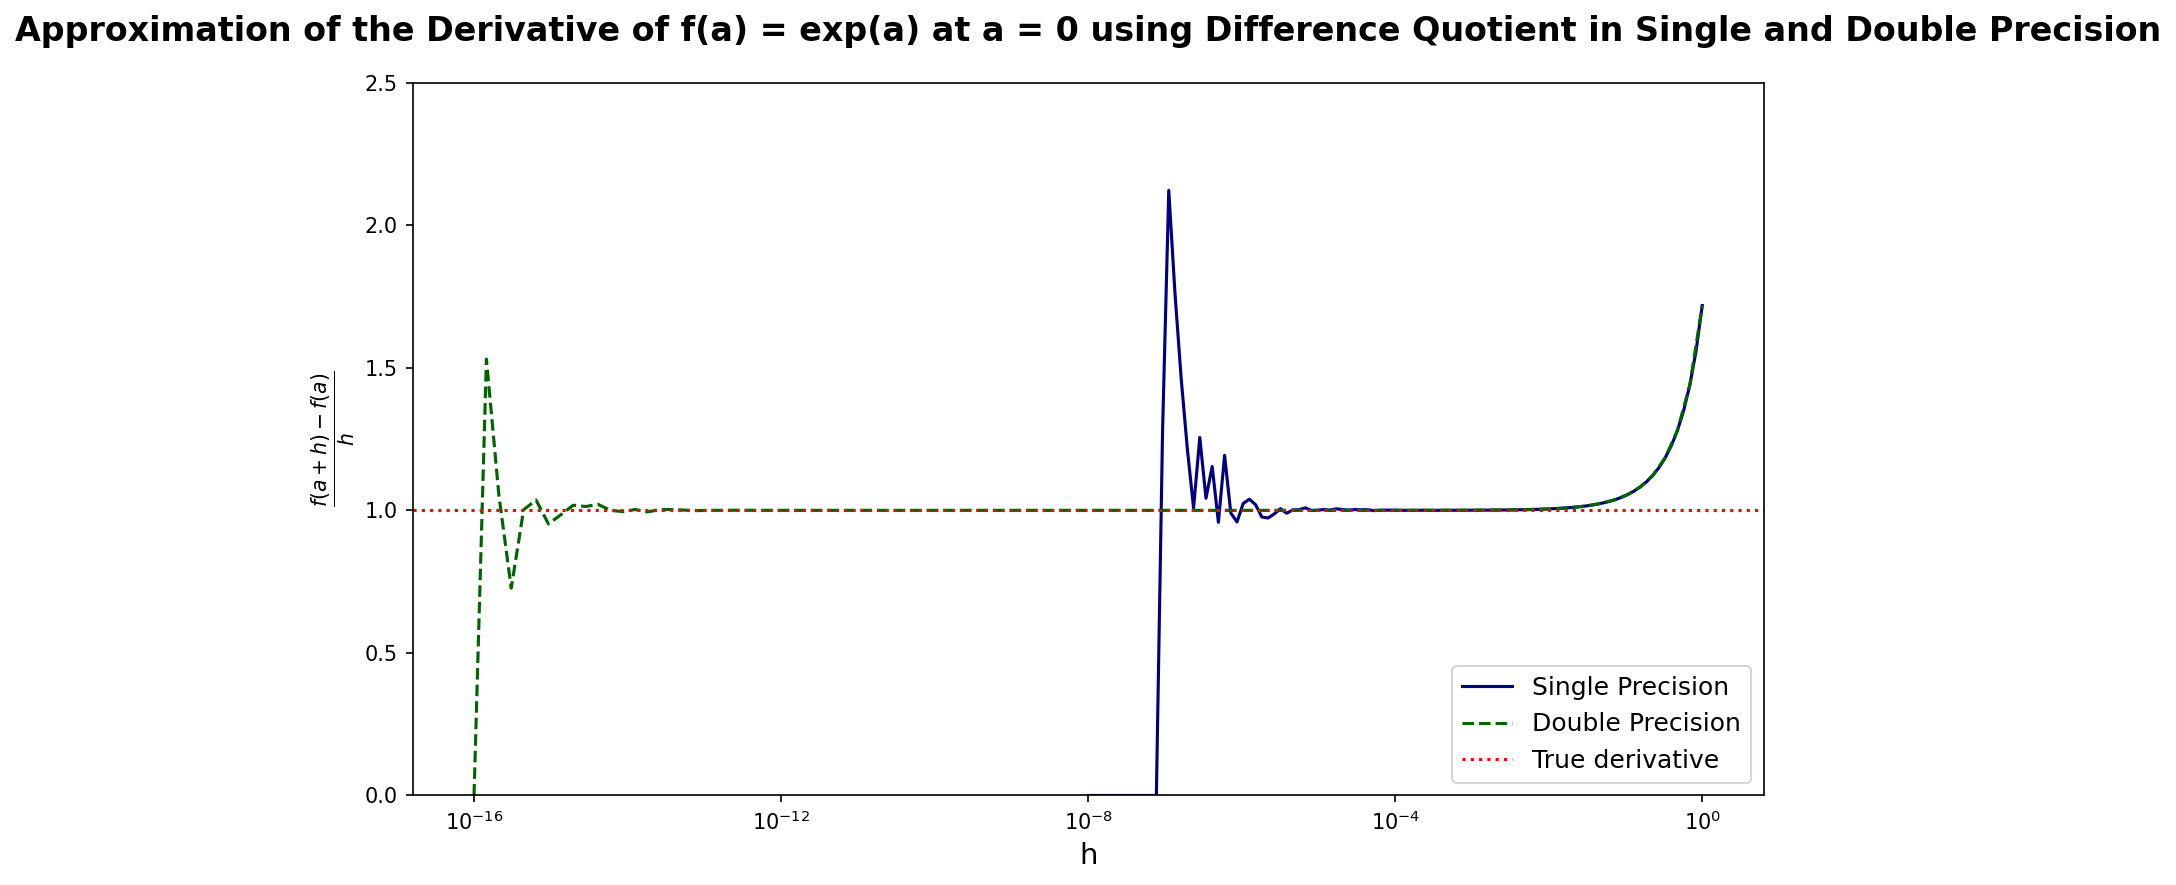

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f1(a):
    return np.exp(a)

def f1_derivative(a):
    return np.exp(a)

def approx_derivative(a, h, dtype, f):
    a = dtype(a)
    h = dtype(h)
    return (f(a + h) - f(a)) / h

def plot_derivative():
    a = 0
    f = f1
    true_derivative = f1_derivative(a)
    y_label = r"$\frac{f(a+h) - f(a)}{h}$"

    # Single precision
    h_values_single = np.logspace(-8, 0, num=100, dtype=np.float32)
    derivatives_single = [approx_derivative(a, h, np.float32, f) for h in h_values_single]

    # Double precision
    h_values_double = np.logspace(-16, 0, num=100, dtype=np.float64)
    derivatives_double = [approx_derivative(a, h, np.float64, f) for h in h_values_double]

    fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
    ax.plot(h_values_single, derivatives_single, label="Single Precision", linestyle="-",color="navy")
    ax.plot(h_values_double, derivatives_double, label="Double Precision", linestyle="--",color="darkgreen")
    ax.axhline(true_derivative, color='r', linestyle=":", label="True derivative")

    ax.set_xscale("log")
    ax.set_xticks([1e-16, 1e-12, 1e-8, 1e-4, 1e0])
    ax.set_ylim(0, 2.5)
    ax.set_xlabel("h", fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.set_title("Approximation of the Derivative of f(a) = exp(a) at a = 0 using Difference Quotient in Single and Double Precision", fontsize=16, pad=20, fontweight= 'bold')
    ax.legend(fontsize=12, loc="lower right")

    plt.tight_layout()
    plt.show()

# Call the plot_derivative function
plot_derivative()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatLogSlider

def f1(a):
    return np.exp(a)

def f1_derivative(a):
    return np.exp(a)

def approx_derivative(a, h, dtype, f):
    a = dtype(a)
    h = dtype(h)
    return (f(a + h) - f(a)) / h


def plot_derivative(h):
    a = 0
    f = f1
    true_derivative = f1_derivative(a)

    # Single precision
    h_values_single = np.logspace(-16, 0, num=500, dtype=np.float32)
    derivatives_single = [approx_derivative(a, h, np.float32, f) for h in h_values_single]
    errors_single = np.abs(derivatives_single - true_derivative)

    h_values_double = np.logspace(-16, 0, num=500 , dtype=np.float64)
    derivatives_double = [approx_derivative(a, h, np.float64, f) for h in h_values_double]
    errors_double = np.abs(derivatives_double - true_derivative)


    # Compute the error for the current value of h
    current_error_single = np.abs(approx_derivative(a, h, np.float32, f) - true_derivative)
    current_error_double = np.abs(approx_derivative(a, h, np.float64, f) - true_derivative)

    fig, ax = plt.subplots(figsize=(18, 10), dpi=300)
    ax.plot(h_values_single, errors_single, label="Single Precision", linestyle="-", color="navy")
    ax.plot(h_values_double, errors_double, label="Double Precision", linestyle="--", color="darkgreen")
    ax.axvline(h, color='k', linestyle=':', label=f"Selected h = {h:.3e}")
    ax.plot(h, current_error_single, color='b', marker='o', markersize=9, label=f"Single Precision Error = {current_error_single:.3e}")
    ax.plot(h, current_error_double, color='g', marker='o', markersize=9, label=f"Double Precision Error = {current_error_double:.3e}")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("h", fontsize=14)
    ax.set_ylabel("Error", fontsize=14)
    ax.set_title(f"Error in Approximation of the Derivative of f(a) = exp(a) at a = {a:.2f} using Difference Quotient in Single and Double Precision", fontsize=16, fontweight='bold', pad = 40)
    ax.legend(fontsize=12)

    ax.set_ylim([1e-15, 10])
    plt.show()

# Create a FloatLogSlider for h values
h_slider = FloatLogSlider(value=1e-4, base=10, min=-16, max=0, step=0.1, description="h:", style={'description_width': 'initial'})

# Create an interactive widget with the plot_derivative function and the h_slider
interactive_plot = interactive(plot_derivative, h=h_slider)

# Display the interactive widget
display(interactive_plot)


interactive(children=(FloatLogSlider(value=0.0001, description='h:', max=0.0, min=-16.0, style=SliderStyle(des…